In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Import our data! 

link to our data 
[kaggle](https://www.kaggle.com/datasets/kemical/kickstarter-projects?select=ks-projects-201801.csv)

In [2]:
kick_starter = pd.read_csv('ks-projects-201801.csv')

Displaying the first and last rows to get an idea of what the data looks like. 

In [3]:
kick_starter.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [4]:
kick_starter.tail(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [5]:
# Displaying the size and data types of our data
df_shape = kick_starter.shape
print(f'The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns! \n')
print(kick_starter.info())

The DataFrame has 378661 rows and 15 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64

In [6]:
# checking to see if any values are null in data 
print(kick_starter.isnull().any().any())

True


In [7]:
# Getting a count of null values in each column  
kick_starter.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
# getting column names
kick_starter.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [9]:
# Getting an idea of what the data looks like
kick_starter['state'].value_counts()

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
kick_starter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,"378,661.00","378,661.00","378,661.00","378,661.00","374,864.00","378,661.00","378,661.00"
mean,"1,074,731,191.99","49,080.79","9,682.98",105.62,"7,036.73","9,058.92","45,454.40"
std,"619,086,204.32","1,183,391.26","95,636.01",907.19,"78,639.75","90,973.34","1,152,950.06"
min,"5,971.00",0.01,0.00,0.00,0.00,0.00,0.01
25%,"538,263,516.00","2,000.00",30.00,2.00,16.98,31.00,"2,000.00"
50%,"1,075,275,634.00","5,200.00",620.00,12.00,394.72,624.33,"5,500.00"
75%,"1,610,148,624.00","16,000.00","4,076.00",56.00,"3,034.09","4,050.00","15,500.00"
max,"2,147,476,221.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","166,361,390.71"


---

#### Below is our code we used used to do come cleaning. Lets clean it up by putting it in a function. 

**Instructions:** 
- Put the code into the Function we defined `clean_ks`
- Make user you indent your code inside the function 
- Add a return statement `return kick_kickstarter` 
- Be sure to have the comments so we know what the function does. 

Put the below into a function:

```python
# Clean column names
kick_starter.columns = kick_starter.columns.str.title()
kick_starter.columns = kick_starter.columns.str.strip().str.replace('_', ' ')

# Drop unnecessary columns
cols_to_drop = ['Id', 'Deadline', 'Launched']
kick_starter = kick_starter.drop(columns=cols_to_drop)

# Drop rows with missing values
kick_starter = kick_starter.dropna()
```

In [11]:
def clean_ks(kick_starter) -> pd.DataFrame:
    kick_starter.columns = kick_starter.columns.str.title()
    kick_starter.columns = kick_starter.columns.str.strip().str.replace('_', ' ')

    # Drop unnecessary columns
    cols_to_drop = ['Id', 'Deadline', 'Launched']
    kick_starter = kick_starter.drop(columns=cols_to_drop)

    # Drop rows with missing values
    kick_starter = kick_starter.dropna()
    return kick_starter

In [12]:
# def clean_ks(kick_starter) -> pd.DataFrame:
  # your code here

In [13]:
# calling our function to clean our data
kick_starter_cleaned = clean_ks(kick_starter)
kick_starter_cleaned.head()
# remember we want to call the kick_starter_cleaned dataframe rather than kick_starter
# kick_starter will not be cleaned only kick_starter_cleaned is. 

,Name,Category,Main Category,Currency,Goal,Pledged,State,Backers,Country,Usd Pledged,Usd Pledged Real,Usd Goal Real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,"1,000.00",0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,"30,000.00","2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,Where is Hank?,Narrative Film,Film & Video,USD,"45,000.00",220.00,failed,3,US,220.00,220.00,"45,000.00"
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,"5,000.00",1.00,failed,1,US,1.00,1.00,"5,000.00"
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,"19,500.00","1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


### Notes from above 

A few notes on the function as we introduced a couple new concepts.  
When you look at at the predefined function I added the weird arrow. This is called type hinting. This is a super helpful thing to add to functions.  

### What is Type Hinting in Python?
Type hinting is a feature in Python that allows you to specify the expected data types of variables, function parameters, and return values. It is a way to make your code more explicit, readable, and self-documenting by indicating what types of data the code works with.

Python is a dynamically typed language, meaning you don't have to declare variable types explicitly. However, type hinting provides a way to statically annotate the code with type information, helping both humans and tools (like linters and IDEs) understand the intended usage.


### What Type Hinting Does
Improves Code Readability:

- Type hints show other developers (or your future self) the types of data your code expects and produces.

Example:

```python
def add_numbers(a: int, b: int) -> int:
    return a + b
```

- This makes it clear that `a` and `b` should be integers and that the function returns an integer.

**Assists with Debugging:**

- Type hints can catch errors before running the code. Tools like mypy can check your type hints and flag mismatched types.

**Enhances IDE Support:**

- IDEs like PyCharm or VSCode can provide better autocomplete suggestions, detect potential type errors, and offer contextual help based on type annotations.

**Documents Your Code Automatically:**

- Type hints serve as inline documentation, reducing the need for extra comments about the data types.

Example:
```python
def greet(name: str) -> str:
    return f"Hello, {name}!"
```

Without type hints, you'd need comments to describe name and the return value.

**Does Not Affect Runtime:**

Type hints do not enforce or change the behavior of your code at runtime. They are purely for developers and static analysis tools. Ultimately it allows us to know how to use the code easier down the road.

## Docstring comments

- Docstring comments are multi-line strings enclosed in triple quotes (""" """)
- They are placed at the beginning of a function to describe its purpose, behavior, and usage. - - They serve as the official documentation for the code and typically include details about what the function does, its parameters (name, type, and purpose), return values, and sometimes examples or additional notes. 
- Docstrings improve code readability, help developers understand the codebase, and can be accessed programmatically using tools like help() or __doc__. 
- They follow specific conventions, such as those outlined in PEP 257.

```python
def clean_ks(kick_starter) -> pd.DataFrame:
    """
    Cleans and processes the Kickstarter DataFrame.

    This function performs the following operations on the input DataFrame:
    1. Cleans column names (capitalizes and removes underscores).
    2. Drops unnecessary columns ('Id', 'Deadline', 'Launched').
    3. Removes rows with missing values.

    Parameters:
        kick_starter (pandas.DataFrame): The input Kickstarter dataset.

    Returns:
        pandas.DataFrame: The cleaned and processed DataFrame.

    Example:
        >>> clean_kick_starter = clean_ks(kick_starter)
    """

```

# Filtering our data 

Previously we had our code
```python
kick_starter = kick_starter[kick_starter['Country'] == 'US']
```
We are going to convert this into a function so we dynamically change the country incase we will to look at other countries in the project. 

In [14]:
def filter_by_country(kick_starter: DataFrame, country: str) -> DataFrame:
    """
    Filters the Kickstarter dataset to include only rows for a specific country.

    Parameters:
        kick_starter (pandas.DataFrame): The Kickstarter dataset containing a 'Country' column.
        country (str): The country to filter the dataset by.

    Returns:
        pandas.DataFrame: A filtered DataFrame containing only rows where the 'Country' column matches the specified country.
    """
    return kick_starter[kick_starter['Country'] == country]

In [15]:
kick_starter_filtered = filter_by_country(kick_starter_cleaned, "US")
kick_starter_filtered.head(1)
# moving forward we will want to use kick_starter_filtered 
# it will be the only one that is cleaned and filtered

,Name,Category,Main Category,Currency,Goal,Pledged,State,Backers,Country,Usd Pledged,Usd Pledged Real,Usd Goal Real
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,"30,000.00","2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"


- Call the function to filter to 'GB'
- Be sure to assign this to a **new** variable. 

In [16]:
gb_filter = filter_by_country(kick_starter_cleaned, "GB")

This is a lot of extra work for code we probably won't reuse and doesn't make sence to be in a function. I wanted to put everything together from above to get you used to seeing it.  

In [17]:
def summarize_backers(kick_starter: DataFrame) -> str:
    """
    Calculates and summarizes the total, mean, and median number of backers 
    from a Kickstarter dataset.

    Parameters:
        kick_starter (pandas.DataFrame): The Kickstarter dataset containing a 
                                         'Backers' column.

    Returns:
        str: A formatted string summarizing the total, mean (rounded to 2 decimal places),
             and median number of backers.
    """
    # Calculate total, mean, and median backers
    backer_sum = kick_starter['Backers'].sum()
    backer_mean = kick_starter['Backers'].mean().round(2)
    backer_median = kick_starter['Backers'].median()

    # Return a formatted string
    return (f"The total number of backers is {backer_sum}.\n"
            f"The mean number of backers is {backer_mean}.\n"
            f"The median number of backers is {backer_median}.")


In [18]:
# Calling the function from above and printing it.  
summary = summarize_backers(kick_starter)
print(summary)

The total number of backers is 39993219.
The mean number of backers is 105.62.
The median number of backers is 12.0.


# Convert the below to a function using what we have learned above! 

- call the function `category_backers_summary`

In [19]:

def category_backers_summary(Category, Backers):

    # Group by Category and sum the backers
    category_backers = kick_starter.groupby('Category')['Backers'].sum().reset_index()


    # Find the category with the most backers
    most_backers_category = category_backers.idxmax()
    most_backers = category_backers.max()

    # Sorting the vales 
    category_backers = category_backers.sort_values(by='Backers', ascending=False)

    return category_backers

---

# Plotting!

We are going to use the function to look at the last 10 categories by backer count. 
- Lets assume we are tasked with finding if launching a quilting kickstarter is a good idea
- Looking at the data do you thing this would be a good idea? 
- We will deliver a plot and a chart to mgmt to show them our findings. 

In [20]:
# Call our function and be sure to use kick_starter_filtered to call it. 
category_backers_summary("Quilts", kick_starter_filtered) 



,Category,Backers
113,Product Design,6178913
136,Tabletop Games,6049205
148,Video Games,4419505
39,Documentary,1447677
138,Technology,1155297
...,...,...
64,Glass,2592
118,Quilts,1893
43,Embroidery,1588
33,Crochet,1272


### Our first plot

**Instructions**

**Understand the Problem:**
- You want to visualize the bottom 10 categories (based on backers) in a bar chart.

**Step-by-Step Guide:**
- Access the Last 10 Rows: Use the .tail() method to get the last 10 rows of the category_backers_summary DataFrame.
- Assign this to the variable `cat_tail`
- Now that we have the variable `cat_tail` lets plot it!
- We will do a simple plot and build upon it 
- Plot a Bar Chart: Use the `.plot.bar()` method on cat_tail to create a bar chart.

Tip: By default, the bar chart will use the DataFrame's index as the x-axis and numeric columns as the y-axis. Make sure the index is meaningful for this plot.


<Axes: >

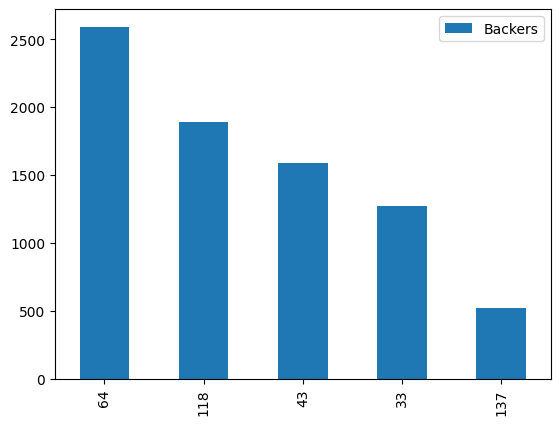

In [26]:
cat_tail = category_backers_summary("Quilts", kick_starter_filtered).tail()
cat_tail.plot.bar()
# your code here 

^ This is not a great plot but we get a quick look at what it's going to look like. This is great when exploring our data and we want to see the data differently. 



Lets adjust the plot to make it better to look at for a viewer. 

We will adjust the above code and add more parameters to the `.plot()` method.
- we will use `kind=` to pick the type of plot to use 
- `x=` will define what our x axis is 
- `y=` will define what the y axis is
- `rot=` will rotate our x labels 
- `color=` will be the color our plot
- `figsize=` is the size in inches of the plot 
- `.set()` we will use after `.plot()`
- `xlabel=` will set our x axis label 
- `ylabel=` will set our y axis label 

### 1. Adjusting .plot() Arguments
- kind=
    - Choose the type of plot. For a bar plot, set it to 'bar'.

- x=
    - Specify the column for the x-axis. Use the column name that contains the categories (e.g., 'Category').

- y=
    - Specify the column for the y-axis. Use the column name that contains numerical values (e.g., 'Backers').

- rot=
    - Rotate the x-axis labels for better readability. For vertically oriented labels, set rot=90.

- color=
    - Choose the color of the bars. Use a color name like 'skyblue' or a hex code (e.g., '#87CEEB').

- figsize=
    - Define the plot size in inches (width, height). A common size for a clear bar plot is (10, 6).

### 2. Adjusting .set() Arguments
- xlabel=
    - Set the label for the x-axis. Use a descriptive name like 'Category'.

- ylabel=
    - Set the label for the y-axis. Use a descriptive name like 'Number of Backers'.



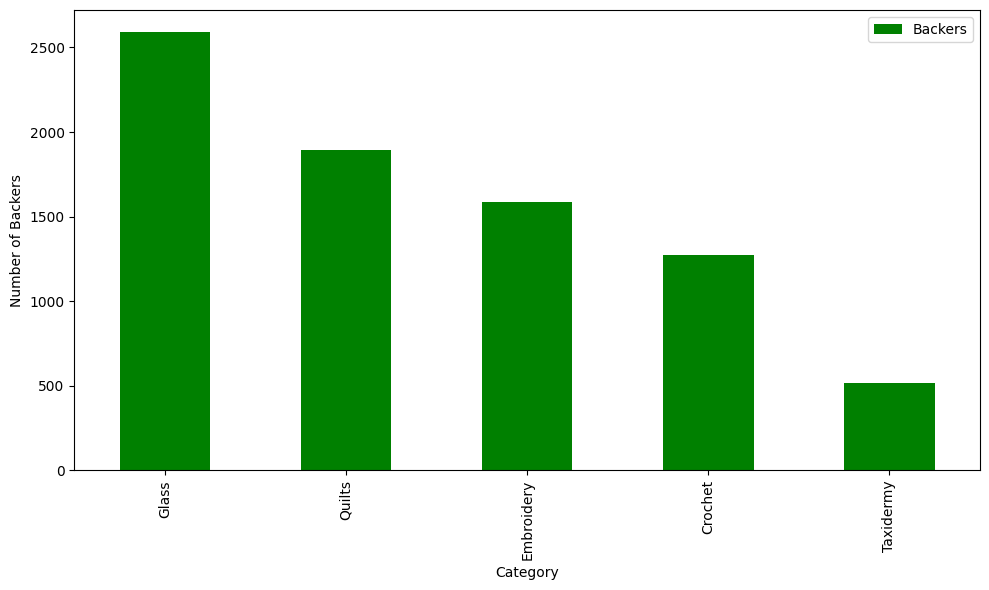

In [28]:
cat_tail.plot(
    kind='bar', 
    x='Category', 
    y='Backers', 
    rot=90, 
    color='green', 
    figsize=(10,6)
).set(
    xlabel='Category', 
    ylabel='Number of Backers'
)
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

The Below plot Will clearly answer our question from above. 

- Lets assume we are tasked with finding if launching a quilting kickstarter is a good idea
- Looking at the data do you thing this would be a good idea? 
- We will deliver a plot and a chart to mgmt to show them our findings. 

We have the option to toggle the plot save in the code to same the image and we have the code to save the chart as well. 


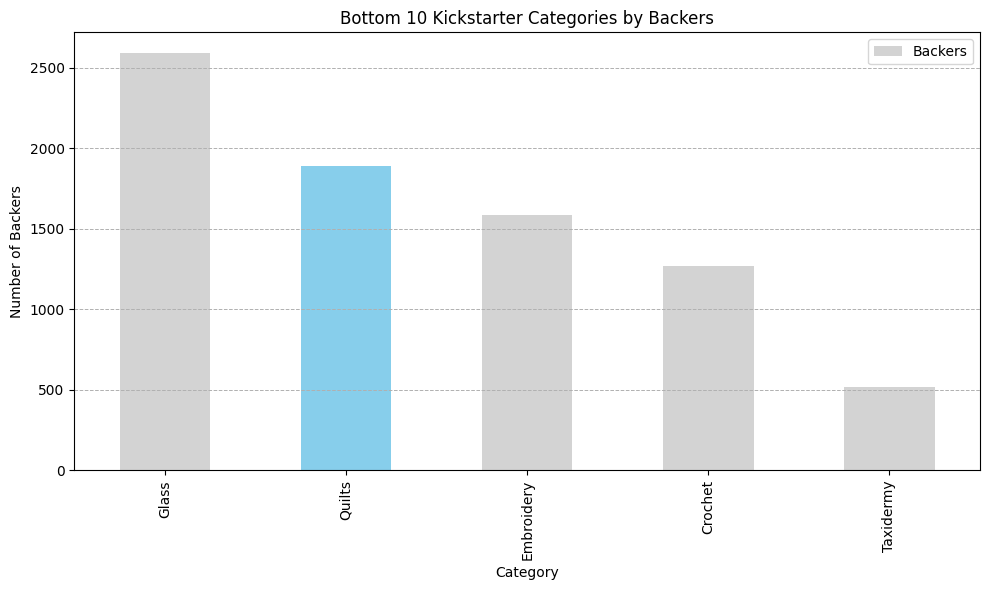

In [29]:
categories = cat_tail['Category']
colors = ['lightgrey' if category != 'Quilts' else 'skyblue' for category in categories]
cat_tail.plot(kind='bar', x='Category', y='Backers', rot=90, color=colors, figsize=(10,6))

# Add title and axis labels
plt.title('Bottom 10 Kickstarter Categories by Backers')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add gridlines for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
# plt.savefig('quilting.jpg') # optional to save the plot
plt.show()

# saves chart
# cat_tail.to_csv('chart.csv', index=False)


### Instructions for Plotting with Matplotlib
**Create the Plot:**

- Use plt.bar() to create the bar plot.  
Specify the x-axis values (categories) and y-axis values (number of backers) that will be used for the plot.
Customize the Plot:

- Set the figure size using plt.figure(figsize=(width, height)).
Rotate the x-axis labels for better readability with plt.xticks(rotation=90).
Add a Title and Labels:

- Use plt.title() to add a title to the plot.
- Use plt.xlabel() to label the x-axis.
- Use plt.ylabel() to label the y-axis.
- Optional: Add Gridlines:

- Use plt.grid() to add gridlines to the plot for easier reading. You can customize the gridlines by specifying the axis, style, and width.
Adjust Layout:

- Ensure the plot looks nice and tidy by using plt.tight_layout() to prevent overlap of labels or titles.
- Show the Plot:

- Use plt.show() to display the plot.

In [ ]:
# Step 1: Extract Data
# Replace these with your actual DataFrame columns
categories = # Enter the category column (e.g., cat_tail['Category'])
backers = # Enter the backer column (e.g., cat_tail['Backers'])

# Step 2: Create the Plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(categories, backers, color='skyblue')  # Create a bar plot

# Step 3: Rotate x-axis labels
plt.xticks(rotation=90)

# Step 4: Add Title and Labels
plt.title('Bottom 10 Kickstarter Categories by Backers')  # Title of the plot
plt.xlabel('Category')  # Label for x-axis
plt.ylabel('Number of Backers')  # Label for y-axis

# Step 5: Optional - Add Gridlines
# Uncomment the following line if you want to add gridlines
# plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Step 6: Adjust Layout
plt.tight_layout()  # Adjust layout to avoid overlap

# Step 7: Show the Plot
plt.show()


# Make your own plots here

- Take the prior code we have and alter the plot to see what different arguments do 
- Make a new plot of something from the data 

# reference code

In [ ]:
# Filter the DataFrame for successful projects
filtered_data = kick_starter[kick_starter['State'] == 'successful']

# Group by Category and State and sum the specified columns
top_ten_cats = filtered_data.groupby(['Category', 'State'])[['Backers', 'Usd Pledged Real']].sum().reset_index()

# Sort the entire DataFrame by 'Usd Pledged Real' in descending order
top_ten_cats = top_ten_cats.sort_values(by='Usd Pledged Real', ascending=False)

top_ten_cats.head()


In [ ]:
# 1. Top 10 Categories by Total Pledged Amount
plt.figure(figsize=(10, 6))
top_pledged = top_ten_cats.groupby('Category')['Usd Pledged Real'].sum().nlargest(10)

# Highlight the highest value in blue, others in light grey
colors = ['blue' if i == 0 else 'lightgrey' for i in range(len(top_pledged))]

plt.bar(top_pledged.index, top_pledged.values, color=colors)

# Add value only on the blue bar (the highest one)
plt.text(0, top_pledged.values[0], f'{top_pledged.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')

# Formatting for x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Total Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Total Pledged Amount (USD)')

# Add comma formatting for y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

# 2. Top 10 Categories by Number of Backers
plt.figure(figsize=(10, 6))
top_backers = top_ten_cats.groupby('Category')['Backers'].sum().nlargest(10)

# Highlight the highest value in blue, others in light grey
colors = ['blue' if i == 0 else 'lightgrey' for i in range(len(top_backers))]

plt.bar(top_backers.index, top_backers.values, color=colors)

# Add value only on the blue bar (the highest one)
plt.text(0, top_backers.values[0], f'{top_backers.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')

# Formatting for x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Number of Backers')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add comma formatting for y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()
